## **Email Spam Detector using Machine Learning**


![](https://www.animatedimages.org/data/media/235/animated-email-image-0191.gif)


### We've all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

### In this project, we will use Python to build an email spam detector. Our goal is to train a machine learning model to recognize and classify emails into spam and ham (non-spam). By doing so, we aim to effectively filter out unwanted and potentially harmful emails from our inbox.

### We'll follow the data science process to accomplish this task, including data loading, preprocessing, feature extraction, model training, evaluation, and making predictions. Let's dive in and build our email spam detector!

## **Import Libraries**

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


## **Load and Explore the Dataset**

In [248]:
# Load the dataset
df = pd.read_csv("/kaggle/input/email-spam-and-non-spam-datasets/mail_data.csv")

# Display the first few rows of the dataset
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## **Data Preprocessing**

In [249]:
# Convert 'spam' and 'ham' to binary labels
df['Category'] = df['Category'].map({'spam': 0, 'ham': 1})

# Split the data into features (X) and target (Y)
X = df["Message"]
Y = df["Category"]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=3)


##  **Feature Extraction - TF-IDF**

In [250]:
# TF-IDF feature extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)


## **Model Training**

In [251]:
# Model training
model = LogisticRegression()
model.fit(X_train_features, Y_train)


LogisticRegression()

## **Model Evaluation**

In [252]:
# Model evaluation
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))


Accuracy on training data: 96.3545981772991 %
Accuracy on test data: 95.89953869810354 %


## **Confusion Matrix Visualization**

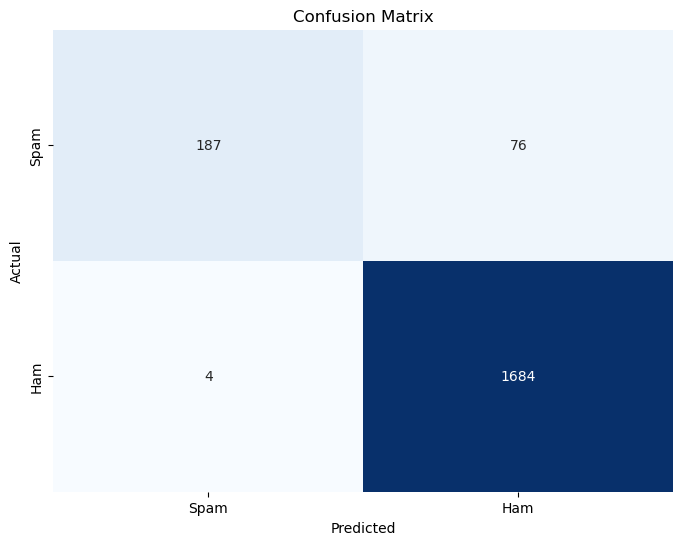

In [253]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## **Calculating and Displaying Error Metrics**

In [254]:
# Classification report
classification_rep = classification_report(Y_test, prediction_on_test_data,target_names=['Spam', 'Ham'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

        Spam       0.98      0.71      0.82       263
         Ham       0.96      1.00      0.98      1688

    accuracy                           0.96      1951
   macro avg       0.97      0.85      0.90      1951
weighted avg       0.96      0.96      0.96      1951



In [255]:
# Metrics calculation
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)

Accuracy :  0.9589953869810354
Precision :  0.9568181818181818
Recall :  0.9976303317535545
Specificity :  0.7110266159695817


## **Make Predictions on New Input**

In [259]:
# Make predictions on new input
#Spam i/p: BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile internet/service menu
#Ham i/p: Keep yourself safe for me because I need you and I miss you already and I envy everyone that see's you in real life
input_your_mail = input("Enter The Mail Text: ")
input_data_features = feature_extraction.transform([input_your_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")


Enter The Mail Text:  BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile internet/service menu


Spam Mail
